In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
dataset=pd.read_csv("sonar data.csv",header=None)

In [7]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [8]:
dataset[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [9]:
dataset.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [10]:
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [12]:
logestic_model=LogisticRegression()
logestic_model.fit(x_train,y_train)

LogisticRegression()

In [13]:
train_prediction=logestic_model.predict(x_train)

In [14]:
train_accuracy=accuracy_score(train_prediction,y_train)

In [15]:
print("Training Data Accuracy: ",train_accuracy)

Training Data Accuracy:  0.8373493975903614


In [16]:
test_prediction=logestic_model.predict(x_test)
logistic_regression_accuracy=accuracy_score(test_prediction,y_test)

In [17]:
print("Test Data Accuracy: ",logistic_regression_accuracy)

Test Data Accuracy:  0.8571428571428571


#### Making Prediction using a input example

In [19]:
data_input=(0.0335,0.0258,0.0398,0.0570,0.0529,0.1091,0.1709,0.1684,0.1865,0.2660,0.3188,0.3553,0.3116,0.1965,0.1780,0.2794,0.2870,0.3969,0.5599,0.6936,0.7969,0.7452,0.8203,0.9261,0.8810,0.8814,0.9301,0.9955,0.8576,0.6069,0.3934,0.2464,0.1645,0.1140,0.0956,0.0080,0.0702,0.0936,0.0894,0.1127,0.0873,0.1020,0.1964,0.2256,0.1814,0.2012,0.1688,0.1037,0.0501,0.0136,0.0130,0.0120,0.0039,0.0053,0.0062,0.0046,0.0045,0.0022,0.0005,0.0031)
data_input_to_array=np.asarray(data_input)
data_input_to_array_reshape=data_input_to_array.reshape(1,-1)

In [20]:
Prediction=logestic_model.predict(data_input_to_array_reshape)

In [21]:
if(Prediction[0]=='R'):
    print("The object is a Rock")
else:
    print("The object is a Mine")

The object is a Mine


#### Using Other Models to test and compare accuracy of each model

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

##### DecisionTreeClassifier

In [26]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
decision_tree_test_prediction=decision_tree.predict(x_test)
decision_tree_accuracy=accuracy_score(decision_tree_test_prediction,y_test)

In [28]:
print("Decision Tree Accuracy: ",decision_tree_accuracy)

Decision Tree Accuracy:  0.8095238095238095


##### RandomForestClassifier

In [30]:
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
random_forest_test_prediction=random_forest.predict(x_test)
random_forest_accuracy=accuracy_score(random_forest_test_prediction,y_test)

In [32]:
print("Random Forest Classifier Accuracy: ",random_forest_accuracy)

Random Forest Classifier Accuracy:  0.8571428571428571


##### SVM

In [34]:
svc_model=SVC()
svc_model.fit(x_train,y_train)

SVC()

In [35]:
svc_model_test_prediction=svc_model.predict(x_test)
svc_model_accuracy=accuracy_score(svc_model_test_prediction,y_test)

In [36]:
print("Support Vector Classification Accuracy: ",svc_model_accuracy)

Support Vector Classification Accuracy:  0.8095238095238095


##### Naive Bayes

In [38]:
naive_bayes=GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [39]:
naive_bayes_test_prediction=naive_bayes.predict(x_test)
naive_bayes_accuracy=accuracy_score(naive_bayes_test_prediction,y_test)

In [40]:
print("Naive Bayes Accuracy: ",naive_bayes_accuracy)

Naive Bayes Accuracy:  0.6428571428571429


### Visualizition of accuracy score of diffrent models

In [42]:
import matplotlib.pyplot as plt

In [44]:
accuracies={'Logistic Regression':logistic_regression_accuracy*100,'Decision Tree':decision_tree_accuracy*100,'Random Forest':random_forest_accuracy*100,'Support Vector': svc_model_accuracy*100,'Naive Bayes':naive_bayes_accuracy*100}

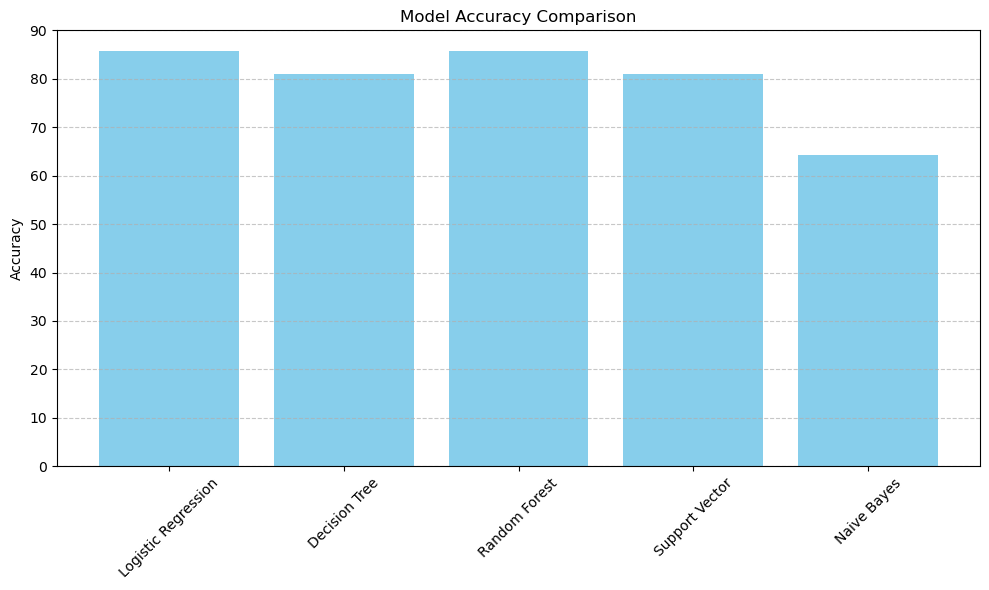

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
max_accuracy = max(accuracies.values())
best_models = [model for model, acc in accuracies.items() if acc == max_accuracy]
colors = ['#FF9B45' if model in best_models else 'skyblue' for model in accuracies]
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, name in zip(bars, accuracies.keys()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}',
             ha='center', va='bottom', fontsize=9)
    
    if name in best_models:
        plt.text(bar.get_x() + bar.get_width() / 2, height + 5,
                 f'Best: {name}', color='#533B4D', weight='bold', ha='center')

plt.tight_layout()
plt.show()